# Project: Wrangling and Analyze Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Gathering Data</a></li>
<li><a href="#eda">Assessing Data</a></li>
<li><a href="#conclusions">Cleaning Data</a></li>
<li><a href="#conclusions">Analyzing Data & Visualization</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project focuses on gathering, assessing, cleaning, and analyzing data from the WeRateDogs Twitter account. The main dataset includes tweet data about dogs, which we enhance using additional sources like image predictions and tweet metadata. The goal is to practice real-world data wrangling techniques using Python libraries like Pandas, NumPy, and Matplotlib, leading to meaningful insights and visualizations.

In [146]:
# Import the required libraries
import pandas as pd
import numpy as np
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [147]:
# Reading (twitter_archive) csv file
twitter_archive = pd.read_csv("/content/twitter-archive-enhanced.csv")

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [148]:
# Import requeste library
import requests
import pandas as pd
import json

In [149]:
# Fetching data from the server using requests.get
data=requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")

In [150]:
# Save the file
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(data.content)

# Read TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep = '\t')

image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [151]:
# Showing the content of image-predicions.tsv
data.content

b"tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog\n666020888022790149\thttps://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg\t1\tWelsh_springer_spaniel\t0.465074\tTrue\tcollie\t0.156665\tTrue\tShetland_sheepdog\t0.0614285\tTrue\n666029285002620928\thttps://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg\t1\tredbone\t0.506826\tTrue\tminiature_pinscher\t0.07419169999999999\tTrue\tRhodesian_ridgeback\t0.07201\tTrue\n666033412701032449\thttps://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg\t1\tGerman_shepherd\t0.596461\tTrue\tmalinois\t0.13858399999999998\tTrue\tbloodhound\t0.11619700000000001\tTrue\n666044226329800704\thttps://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg\t1\tRhodesian_ridgeback\t0.408143\tTrue\tredbone\t0.360687\tTrue\tminiature_pinscher\t0.222752\tTrue\n666049248165822465\thttps://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg\t1\tminiature_pinscher\t0.560311\tTrue\tRottweiler\t0.243682\tTrue\tDoberman\t0.154629\tTrue\n666050758794694657\thttps://pbs.twimg.com/

In [152]:
# Open a file named "image.tsv" in write binary mode to store the retrieved data
f=open("image.tsv","wb")
# Write the content of the fetched data object to the file for saving it locally
f.write(data.content)

335079

In [153]:
# Close the file after writing to ensure all changes are saved properly
f.close()

In [154]:
# Read the TSV file
df_image=pd.read_csv("image.tsv",sep="\t")
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [155]:
# Sending a GET request to fetch the JSON file from the provided URL
df_api=requests.get("https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt")

In [156]:
# Opening a file named "api.txt" in write binary mode to store the retrieved data
f=open("api.txt","wb")
f.write(df_api.content)

10609234

In [157]:
# Opening the "tweet-json.txt" file for reading to start processing the data
f=open("tweet-json .txt")

In [158]:
# Tranform json file to dataframe
tweetlist = []

json_file= open('api.txt')


In [159]:
# Read the first line of the JSON file to examine its structure
json_file.readline()

'{"created_at": "Tue Aug 01 16:23:56 +0000 2017", "id": 892420643555336193, "id_str": "892420643555336193", "full_text": "This is Phineas. He\'s a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", "truncated": false, "display_text_range": [0, 85], "entities": {"hashtags": [], "symbols": [], "user_mentions": [], "urls": [], "media": [{"id": 892420639486877696, "id_str": "892420639486877696", "indices": [86, 109], "media_url": "http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "media_url_https": "https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "url": "https://t.co/MgUWQ76dJU", "display_url": "pic.twitter.com/MgUWQ76dJU", "expanded_url": "https://twitter.com/dog_rates/status/892420643555336193/photo/1", "type": "photo", "sizes": {"large": {"w": 540, "h": 528, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 540, "h": 528, "resize": "fit"}, "medium": {"w": 540, "h": 528, "resize": "fit"}}}]}, "extended_entities": {"med

In [160]:
# Iterate through each line in the JSON file to extract tweet details
for line in json_file:
    tweets_dict = {}
    tweets_json = json.loads(line)
    # Extract the tweet ID, handling cases where the ID might be missing
    try:
        tweets_dict['tweet_id'] = tweets_json['id']
    except:
        tweets_dict['tweet_id'] = 'na'
    # Extract retweet and favorite count from the tweet data
    tweets_dict['retweet_count'] = tweets_json['retweet_count']
    tweets_dict['favorite_count'] = tweets_json['favorite_count']

    # Append the processed tweet information to the tweet list
    tweetlist.append(tweets_dict)



In [161]:
# Display the processed list of tweets, including ID, retweet count, and favorite count
tweetlist

[{'tweet_id': 892177421306343426,
  'retweet_count': 6514,
  'favorite_count': 33819},
 {'tweet_id': 891815181378084864,
  'retweet_count': 4328,
  'favorite_count': 25461},
 {'tweet_id': 891689557279858688,
  'retweet_count': 8964,
  'favorite_count': 42908},
 {'tweet_id': 891327558926688256,
  'retweet_count': 9774,
  'favorite_count': 41048},
 {'tweet_id': 891087950875897856,
  'retweet_count': 3261,
  'favorite_count': 20562},
 {'tweet_id': 890971913173991426,
  'retweet_count': 2158,
  'favorite_count': 12041},
 {'tweet_id': 890729181411237888,
  'retweet_count': 16716,
  'favorite_count': 56848},
 {'tweet_id': 890609185150312448,
  'retweet_count': 4429,
  'favorite_count': 28226},
 {'tweet_id': 890240255349198849,
  'retweet_count': 7711,
  'favorite_count': 32467},
 {'tweet_id': 890006608113172480,
  'retweet_count': 7624,
  'favorite_count': 31166},
 {'tweet_id': 889880896479866881,
  'retweet_count': 5156,
  'favorite_count': 28268},
 {'tweet_id': 889665388333682689,
  'retwe

In [162]:
# Convert tweetlist into a pandas DataFrame for easy analysis
df_api=pd.DataFrame(tweetlist)
# Display the first few rows of the DataFrame to verify its contents
df_api.head()

,tweet_id,retweet_count,favorite_count
0,892177421306343426,6514,33819
1,891815181378084864,4328,25461
2,891689557279858688,8964,42908
3,891327558926688256,9774,41048
4,891087950875897856,3261,20562


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



#twitter_archive table

In [163]:
# Display the first few rows of the dataset
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,NaN,NaN,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,NaN,NaN,NaN,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,NaN,NaN,NaN,NaN
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,NaN,NaN,NaN,NaN


In [164]:
# Display general information about the Twitter archive dataset
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

In [165]:
# Generate descriptive statistics for numeric columns in the dataset
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [166]:
# Check for duplicated rows in the dataset to ensure data integrity
twitter_archive.duplicated().sum()

np.int64(0)

In [167]:
# Check for duplicate tweet IDs to ensure each record is unique
twitter_archive.tweet_id.duplicated().sum()

np.int64(0)

In [168]:
# Count occurrences of unique values in the rating_numerator column
twitter_archive.rating_numerator.value_counts()

,count
rating_numerator,
12,558
11,464
10,461
13,351
9,158
8,102
7,55
14,54
5,37


In [169]:
# Count occurrences of unique values in the rating_denominator column
twitter_archive.rating_denominator.value_counts()

,count
rating_denominator,
10,2333
11,3
50,3
20,2
80,2
0,1
7,1
70,1
170,1


In [170]:
# Count the occurrences of the 'doggo' category in the dataset
twitter_archive.doggo.value_counts()

,count
doggo,
doggo,97


In [171]:
# Count the occurrences of the 'floofer' category in the dataset
twitter_archive.floofer.value_counts()

,count
floofer,
floofer,10


In [172]:
# Count the occurrences of the 'pupper' category in the dataset
twitter_archive.pupper.value_counts()

,count
pupper,
pupper,257


In [173]:
# Count occurrences of the 'puppo' category in the dataset
twitter_archive.puppo.value_counts()

,count
puppo,
puppo,30


In [174]:
# Check the source of the tweets to analyze their origin
twitter_archive.source.value_counts()

,count
source,
"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",2221
"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",91
"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",33
"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",11


#image_prediction table

In [175]:
# Display the response object to confirm the request was successful
data

<Response [200]>

In [176]:
# Save the file
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(data.content)

# Read TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep = '\t')

image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [177]:
# Display general information about the image_prediction dataset
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [178]:
# Generate descriptive statistics for numeric columns in the dataset
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [179]:
# Check for duplicated tweet IDs to ensure data integrity
image_prediction.tweet_id.duplicated().sum()

np.int64(0)

In [180]:
# Check for duplicate image URLs to identify redundant entries
image_prediction.jpg_url.duplicated().sum()

np.int64(66)

In [181]:
# Count occurrences of unique values in the first predicted category (p1)
image_prediction.p1.value_counts()

,count
p1,
golden_retriever,150
Labrador_retriever,100
Pembroke,89
Chihuahua,83
pug,57
...,...
basketball,1
tricycle,1
convertible,1


In [182]:
# Count occurrences of unique values in the first predicted category (p2)
image_prediction.p2.value_counts()

,count
p2,
Labrador_retriever,104
golden_retriever,92
Cardigan,73
Chihuahua,44
Pomeranian,42
...,...
oxygen_mask,1
sandbar,1
umbrella,1


In [183]:
# Count occurrences of unique values in the first predicted category (p3)
image_prediction.p3.value_counts()

,count
p3,
Labrador_retriever,79
Chihuahua,58
golden_retriever,48
Eskimo_dog,38
kelpie,35
...,...
notebook,1
pool_table,1
maraca,1


#tweet_json table

In [184]:
# Show few rows of the dataset
df_api

,tweet_id,retweet_count,favorite_count
0,892177421306343426,6514,33819
1,891815181378084864,4328,25461
2,891689557279858688,8964,42908
3,891327558926688256,9774,41048
4,891087950875897856,3261,20562
...,...,...,...
2348,666049248165822465,41,111
2349,666044226329800704,147,311
2350,666033412701032449,47,128
2351,666029285002620928,48,132


In [185]:
# Display general information about the df_api dataset
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2353 entries, 0 to 2352
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2353 non-null   int64
 1   retweet_count   2353 non-null   int64
 2   favorite_count  2353 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [186]:
# Check for duplicated rows to ensure data integrity
df_api.duplicated().sum()

np.int64(0)

### Quality issues
1.In twitter_archive table: only need original ratings with pictures, retweets and replies entries should be removed, related columns should be removed too. The picture part will be fixed later.

2.In twitter_archive table: abnormal values in rating_numerator, e.g., 1776, 960, 666, 204, 165,etc. make no sense.

3.In twitter_archive table: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id are float, should all be str.

4.In twitter_archive table: abnormal values in rating_denominator, e.g., 170, 150, 130, etc. The rating_denominator is almost always 10.

5.In twitter_archive table: timestamp is str, should be datetime, remove +0000 in timestamp.

6.In twitter_archive table: source info redundent, not easy to read.

7.In image_prediction table: inconsistent capitalization in p1, p2 and p3 columns.

8.In image_prediction table: jpg url duplicates.

9.In tweet_json table: missing data probably due to retweets in twitter_archive.

### Tidiness issues
1.The three tables should be combined into one since they're all related to the same type of observational unit according to tidy data requirements.

2.twitter_archive: doggo, floofer, pupper, puppo are all stages of dog, should be in one column

## Cleaning Data


In [187]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_json_clean = df_api.copy()

##Quality Issues:

### Issue #1:
twitter_archive: we only want original ratings, delete retweets and replies

#### Define: To focus only on original tweets (not replies or retweets), we’ll remove any rows where retweeted_status_id or in_reply_to_status_id is not null.

#### Code

In [188]:
# Remove retweets
twitter_archive_clean = twitter_archive[twitter_archive.retweeted_status_id.isnull()]

# Remove replies
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.isnull()]


#### Test

In [189]:
# Make sure both retweets and replies are removed
print(twitter_archive_clean.retweeted_status_id.notnull().sum())
print(twitter_archive_clean.in_reply_to_status_id.notnull().sum())

0
0


#### Issue #2:
###twitter_archive: abnormal values in rating_numerator, e.g., 1776, 960, etc.

#### Define:
Some rating numerators are way too large to be valid (like 960 or 1776). Most ratings are between 10 and 15, so we’ll keep only those that are less than or equal to 20 to be safe.


#### Code

In [190]:
# Filter out tweets with unusually high rating numerators
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.rating_numerator <= 20]


#### Test

In [191]:
# Check that all remaining numerators are 20 or less
print(twitter_archive_clean.rating_numerator.max())


14


#### Issue #3:
###twitter_archive: abnormal values in rating_denominator, e.g., 170, 150, 130, etc.



#### Define:
Most tweets use a denominator of 10 for ratings (e.g., 12/10). Values like 170 or 150 are errors. We'll filter the dataset to keep only rows where the denominator is 10.

####Code

In [192]:
# Keep only rows where the denominator is 10, since most ratings are out of 10
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.rating_denominator == 10]

####Test

In [193]:
# Check that every denominator is 10
print(twitter_archive_clean.rating_denominator.unique())
assert (twitter_archive_clean.rating_denominator == 10).all()

[10]


#### Issue #4:
###twitter_archive: some names in the name column are not real names (e.g., "a", "an", "the", "None")

#### Define:
Some entries in the name column aren’t actual dog names. These include lowercase words like "a", "an", or "such", which likely come from incorrect extraction. We’ll remove rows where the name is clearly invalid.



####Code

In [194]:
# Remove rows with invalid names (most are lowercase or 'None')
invalid_names = ['a', 'an', 'the', 'very', 'quite', 'just', 'getting', 'one', 'not', 'mad', 'none', 'such', 'officially', 'actually']
twitter_archive_clean = twitter_archive_clean[~twitter_archive_clean.name.str.lower().isin(invalid_names)]

####Test

In [195]:
# Check if any of the invalid names are still present
print(twitter_archive_clean.name.str.lower().isin(invalid_names).sum())
assert not twitter_archive_clean.name.str.lower().isin(invalid_names).any()

0


#### Issue #5:
###twitter_archive: missing values in name, doggo, floofer, pupper, and puppo

#### Define:
Many tweets have missing values in columns like name, doggo, floofer, pupper, and puppo.
For name, we’ll just drop rows with missing values. For the dog stages, we’ll fill missing values with 'None' so they’re consistent and easier to work with later.

####Code

In [196]:
# Drop rows where the name is missing
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.name.notnull()]

# Fill missing values in dog stages with 'None'
dog_stages = ['doggo', 'floofer', 'pupper', 'puppo']
twitter_archive_clean[dog_stages] = twitter_archive_clean[dog_stages].fillna('None')


<ipython-input-196-2026903212>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive_clean[dog_stages] = twitter_archive_clean[dog_stages].fillna('None')


####Test

In [197]:
# Check if there are any missing names
print("Missing names:", twitter_archive_clean['name'].isnull().sum())

# Check missing values in dog stages one by one
print("Missing doggo:", twitter_archive_clean['doggo'].isnull().sum())
print("Missing floofer:", twitter_archive_clean['floofer'].isnull().sum())
print("Missing pupper:", twitter_archive_clean['pupper'].isnull().sum())
print("Missing puppo:", twitter_archive_clean['puppo'].isnull().sum())


Missing names: 0
Missing doggo: 0
Missing floofer: 0
Missing pupper: 0
Missing puppo: 0


#### Issue #6:
###twitter_archive: Some dogs have more than one stage (e.g., both doggo and floofer)

#### Define:
Some tweets have more than one dog stage filled.
We want to create one new column dog_stage that shows just one stage for each dog. If there's more than one, we'll just pick the first one we find.

####Code

In [198]:
# Create a new 'dog_stage' column based on the existing stage columns
dog_stage = []

for i in range(len(twitter_archive_clean)):
    if twitter_archive_clean.iloc[i]['doggo'] != 'None':
        dog_stage.append('doggo')
    elif twitter_archive_clean.iloc[i]['floofer'] != 'None':
        dog_stage.append('floofer')
    elif twitter_archive_clean.iloc[i]['pupper'] != 'None':
        dog_stage.append('pupper')
    elif twitter_archive_clean.iloc[i]['puppo'] != 'None':
        dog_stage.append('puppo')
    else:
        dog_stage.append('None')

# Add the new column to the dataframe
twitter_archive_clean['dog_stage'] = dog_stage

# Drop the original stage columns
twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)


####Test

In [199]:
# Check if the dog_stage column looks okay
print(twitter_archive_clean['dog_stage'].value_counts())

# Double check that the old stage columns are gone
print('doggo' in twitter_archive_clean.columns)
print('floofer' in twitter_archive_clean.columns)


dog_stage
None       1210
pupper      121
doggo        43
puppo        16
floofer       5
Name: count, dtype: int64
False
False


#### Issue #7:
###image_prediction table: Inconsistent capitalization in p1, p2, and p3 columns

####Define:
image_prediction table: Inconsistent capitalization in p1, p2, and p3 columns

####Code

In [200]:
# Convert all values in p1, p2, and p3 columns to lowercase
image_prediction['p1'] = image_prediction['p1'].str.lower()
image_prediction['p2'] = image_prediction['p2'].str.lower()
image_prediction['p3'] = image_prediction['p3'].str.lower()


####Test

In [201]:
# Show unique examples from each column to check if they're lowercase now
print(image_prediction['p1'].sample(10))
print(image_prediction['p2'].sample(10))
print(image_prediction['p3'].sample(10))


1505                 teddy
1076    miniature_pinscher
63      miniature_pinscher
1126            pomeranian
1222               samoyed
727        german_shepherd
241       english_springer
1912    miniature_pinscher
1257                muzzle
1593             chihuahua
Name: p1, dtype: object
1156              beaver
227       english_setter
1765         siamese_cat
1892              prison
1083         boston_bull
1339            cardigan
177           police_van
1361      french_bulldog
1642      cocker_spaniel
326     golden_retriever
Name: p2, dtype: object
1300              basset
1292        snow_leopard
647                  pot
1273          toy_poodle
124             pekinese
332           chimpanzee
1763         boston_bull
1883    lakeland_terrier
1993              kelpie
1868        newfoundland
Name: p3, dtype: object


#### Issue #8:
###image_prediction: Some predictions are not actually dogs

#### Define:
Some entries in the predictions table are not actual dogs — they might be random objects like “shoe”, “chair”, etc.
We want to keep only rows where the top prediction (p1) is a dog, and the prediction was marked as True in the p1_dog column.



####Code


In [202]:
# Keep only rows where p1 is a dog (p1_dog == True)
image_prediction = image_prediction[image_prediction['p1_dog'] == True]

####Test

In [203]:
# Check if there are any rows where p1_dog is False
print(image_prediction['p1_dog'].value_counts())  # should only show True


p1_dog
True    1532
Name: count, dtype: int64


#### Issue #9:
###Columns in tweet_json should be renamed to match other tables


####Define:
The column tweet_id should be renamed to id so that it matches the id columns in the other tables (twitter_archive_clean, image_predictions_clean). This helps during merging later on.



####Code

In [204]:
# Rename tweet_id to id to keep things consistent across tables
tweet_json_clean.rename(columns={'tweet_id': 'id'}, inplace=True)

####Test

In [205]:
# Check if the column was renamed successfully
print(tweet_json_clean.columns)  # should show 'id', 'retweet_count', 'favorite_count'

# Confirm there is no more 'tweet_id'
print('tweet_id' in tweet_json_clean.columns)  # should be False


Index(['id', 'retweet_count', 'favorite_count'], dtype='object')
False


##Tidiness Issues:

###Issue #1:
Dog stages are split into multiple columns (doggo, floofer, pupper, puppo)

####Define:
The dog stages are currently spread across four separate columns. We’ve already solved this earlier by combining them into one new column called dog_stage. So now we just confirm that the solution fixed the tidiness issue.



####Code

In [206]:
# Already combined into a single column and removed the original ones in the quality section

####Test

In [207]:
# Check if 'dog_stage' column exists and others are gone
print(twitter_archive_clean['dog_stage'].value_counts())
print('doggo' in twitter_archive_clean.columns)


dog_stage
None       1210
pupper      121
doggo        43
puppo        16
floofer       5
Name: count, dtype: int64
False


###Issue #2:
image_prediction should be part of the twitter_archive table. Since we only want original ratings that have images, only keep rows with images.

####Define:
*   Use merge to merge the image_prediction table to the twitter_archive table, joining on tweet_id.
*   Use notnull to filter nonnull rows and only keep nonnull rows.



####Code

In [208]:
# Merge tables
twitter_archive_clean = pd.merge(twitter_archive_clean, image_prediction_clean,
                            on = ['tweet_id'], how = 'left')

# number of null values before cleaning
twitter_archive_clean.jpg_url.isnull().sum()

np.int64(43)

In [209]:

twitter_archive_clean = (twitter_archive_clean[twitter_archive_clean.jpg_url.notnull()])

####Test

In [210]:
# number of null values after cleaning
twitter_archive_clean.jpg_url.isnull().sum()

np.int64(0)

## Storing Data


In [211]:
# Store the clean dataframe in a CSV file named twitter_archive_master.csv
twitter_archive_clean.to_csv('twitter_archive_master.csv')

# load data to a dataframe
df = pd.read_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data


### Insights:
1.Insights from Dog Stages

2.Relationship Between Rating and Favorite Count

3.Top Tweets by Favorite Count

In [212]:
# Making sure that all key columns are named 'id'
twitter_archive_clean.rename(columns={'tweet_id': 'id'}, inplace=True)
image_prediction.rename(columns={'tweet_id': 'id'}, inplace=True)

# First merge two tables
df1 = pd.merge(twitter_archive_clean, image_prediction, on='id', how='inner')

# Then merge the result with the third table
final_df = pd.merge(df1, tweet_json_clean, on='id', how='inner')


### Visualization

####Insights from Dog Stages:

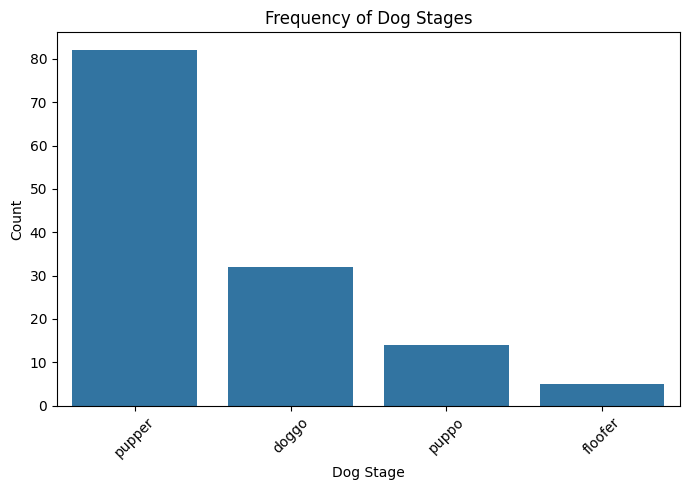

In [213]:
# Filter out 'None' values
filtered_df = final_df[final_df['dog_stage'] != 'None']

# Plot based on that filtered data
plt.figure(figsize=(7, 5))
sns.countplot(data=filtered_df, x='dog_stage', order=filtered_df['dog_stage'].value_counts().index)
plt.title('Frequency of Dog Stages')
plt.xlabel('Dog Stage')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


####Relationship Between Rating and Favorite Count:

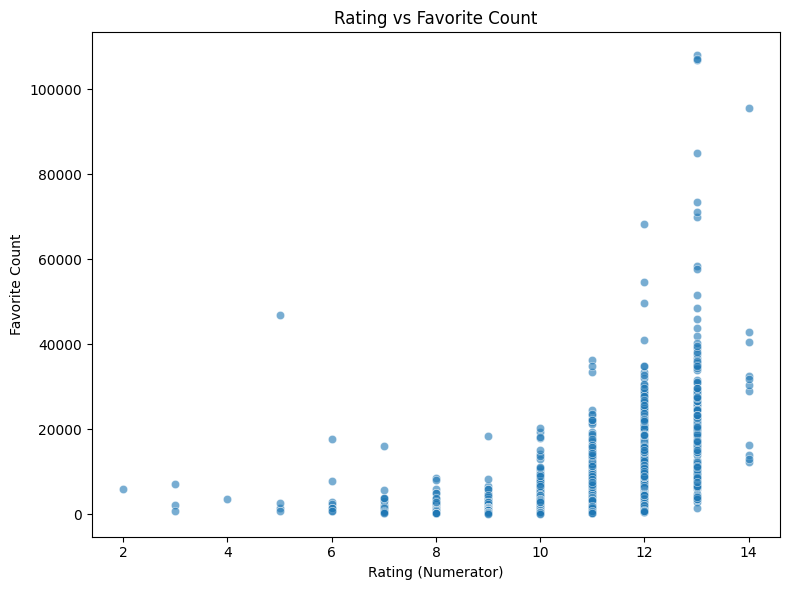

In [214]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=final_df, x='rating_numerator', y='favorite_count', alpha=0.6)
plt.title('Rating vs Favorite Count')
plt.xlabel('Rating (Numerator)')
plt.ylabel('Favorite Count')
plt.tight_layout()
plt.show()

####Top Tweets by Favorite Count:

<ipython-input-215-1231765488>:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


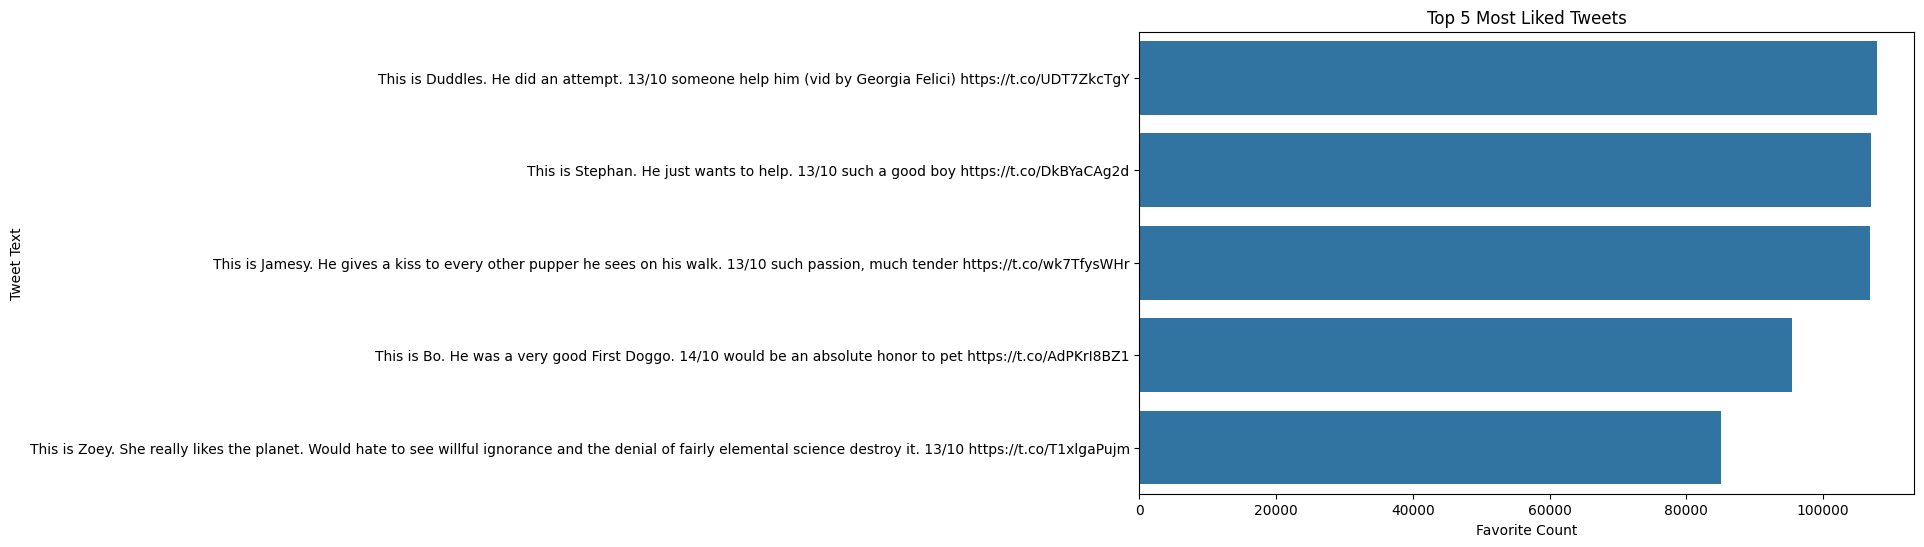

In [215]:
# Show top 5 most liked tweets
top_liked = final_df[['text', 'favorite_count']].sort_values(by='favorite_count', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_liked, x='favorite_count', y='text')
plt.title('Top 5 Most Liked Tweets')
plt.xlabel('Favorite Count')
plt.ylabel('Tweet Text')
plt.tight_layout()
plt.show()
